# データ分類

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns

In [59]:
train_data = pd.read_csv('train_cleaning version1 matsu.csv')
test_data = pd.read_csv('test_cleaning version1 matsu.csv')
target = train_data['y']
train_id = train_data['id']
test_id = test_data['id']

In [60]:
train_data = train_data.drop('y', axis=1)
train_data = train_data.drop('id', axis=1)
test_data = test_data.drop('id', axis=1)

In [66]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18528 entries, 0 to 18527
Columns: 843 entries, accommodates to Shared room
dtypes: float64(8), int64(835)
memory usage: 119.2 MB


In [67]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55583 entries, 0 to 55582
Columns: 843 entries, accommodates to Shared room
dtypes: float64(8), int64(835)
memory usage: 357.5 MB


# 目的変数の対数化

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


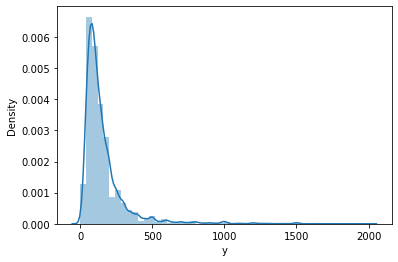

In [68]:
sns.distplot(target);

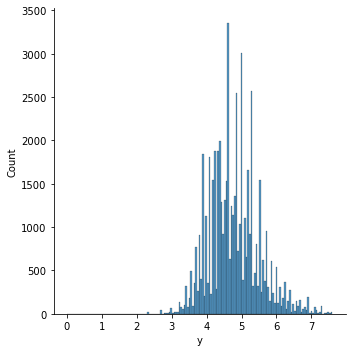

In [69]:
target_log = target.apply(np.log)
sns.displot(target_log);

In [70]:
target_exp = target_log.apply(np.exp)

In [71]:
target_exp == target

0        True
1        True
2        True
3        True
4        True
         ... 
55578    True
55579    True
55580    True
55581    True
55582    True
Name: y, Length: 55583, dtype: bool

In [72]:
from sklearn.model_selection import train_test_split # データ分割
train_75, train_25 = train_test_split(train_data.values, random_state=0).copy()
target_75, target_25 = train_test_split(target.values, random_state=0).copy()
target_log_75, target_log_25 = train_test_split(target_log.values, random_state=0).copy()

# ベースラインモデル
## 重回帰

In [73]:
from sklearn.metrics import mean_squared_error
  
#平均二乗誤差
def result(model, train_75=train_75, train_25=train_25, target_75=target_75, target_25=target_25):

    print('-----RMSE(train)-----')
    print(np.sqrt(mean_squared_error(target_75, model.predict(train_75))))
    print('-----RMSE(test)-----')
    print(np.sqrt(mean_squared_error(target_25, model.predict(train_25))))

In [74]:
#平均二乗誤差(log)
def result_log(model, train_75=train_75, train_25=train_25, target_log_75=target_log_75, target_log_25=target_log_25):
    
    print('-----RMSE(train)-----')
    print(np.sqrt(mean_squared_error(np.exp(target_log_75), np.exp(model.predict(train_75)))))
    print('-----RMSE(test)-----')
    print(np.sqrt(mean_squared_error(np.exp(target_log_25), np.exp(model.predict(train_25)))))

### 対数変換無し

In [75]:
from sklearn.linear_model import LinearRegression
import time
start_time = time.time()
LR = LinearRegression()
LR.fit(train_75, target_75)
end_time = time.time() - start_time

In [76]:
result(LR)
print('time : {}sec'.format(end_time))

-----RMSE(train)-----
115.92328953146225
-----RMSE(test)-----
152342756347.13678
time : 1.6917099952697754sec


### 対数変換有り

In [77]:
start_time = time.time()
LR_log = LinearRegression()
LR_log.fit(train_75, target_log_75)
end_time = time.time() - start_time

In [78]:
# result_log(LR_log)
# print('time : {}sec'.format(end_time))

なぜかわからないけど重回帰だと信じられないくらいスコアが悪くなる。  
コード間違えている以外理由ない気がするけど、他のモデルでは問題なく動く。  
というかさっきまで普通に動いてた  
コメントアウトはなぜかエラー吐く  
原因不明すぎて心が折れた

## ランダムフォレスト

In [17]:
from sklearn.ensemble import RandomForestRegressor

### 対数変換無し

In [18]:
# これは以前やった時にスコアが良かったパラメータ
start_time = time.time()
RF= RandomForestRegressor(min_samples_leaf=18, min_samples_split=16, n_estimators=250, n_jobs=-1, random_state=0)
RF.fit(train_75, target_75)
end_time = time.time() - start_time

In [19]:
result(RF)
print('time : {}sec'.format(end_time))

-----RMSE(train)-----
104.32425096792214
-----RMSE(test)-----
115.1703505466079
time : 187.4457402229309sec


### 対数変換有り

In [20]:
start_time = time.time()
RF_log = RandomForestRegressor(min_samples_leaf=18, min_samples_split=16, n_estimators=250, n_jobs=-1, random_state=0)
RF_log.fit(train_75, target_log_75)
end_time = time.time() - start_time

In [21]:
result_log(RF_log)
print('time : {}sec'.format(end_time))

-----RMSE(train)-----
111.62292109278954
-----RMSE(test)-----
120.7976871034971
time : 160.8278329372406sec


RFの方がスコアは上昇した。  
対数変換については、案の定効果は悪くなった。(数値を見ていないため)

### 重要度計算

,feature
columns,
bedrooms,0.354916
bathrooms,0.217560
Entire home/apt,0.088564
accommodates,0.039327
DC,0.036829
first_review,0.030779
SF,0.029523
last_review_year,0.022742
Elevator,0.015524


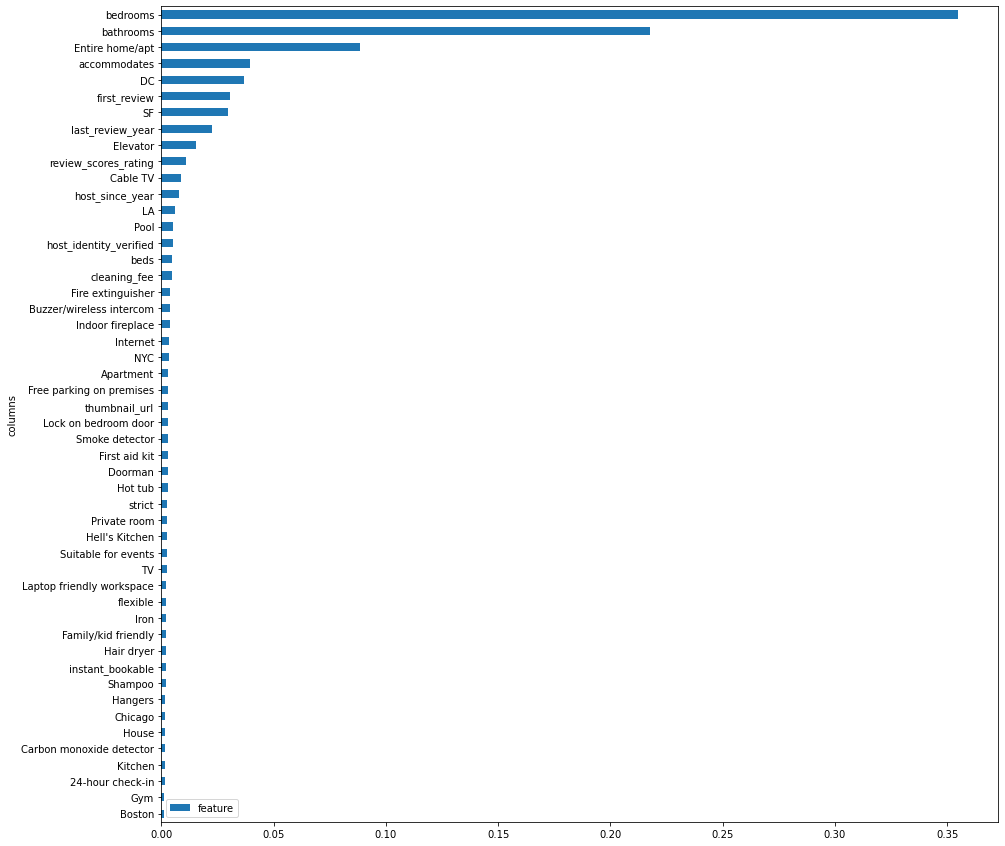

In [102]:
# 
# featureには重み(決定木で言うところの重要度(giniから計算される))が格納されている
#

feature = RF.feature_importances_
feature_df = pd.DataFrame({'columns': train_data.columns[0:], 'feature': feature[:]}).set_index('columns')
feature_df_50 = feature_df.sort_values('feature', ascending=False).head(50)
display(feature_df_50.sort_values('feature', ascending=False))
feature_df_50.sort_values('feature').head(50).plot.barh(figsize=(15, 15));

アパート、ベッド、ベッド数、最大収納人数、場所、アメニティーって感じ

## Ridge
### 対数変換無し

In [79]:
from sklearn.linear_model import Ridge
start_time = time.time()
Ridge = Ridge(alpha=1.0)
Ridge.fit(train_75, target_75)
end_time = time.time() - start_time

In [80]:
result(Ridge)
print('time : {}sec'.format(end_time))

-----RMSE(train)-----
116.01922776693513
-----RMSE(test)-----
122.30047632143541
time : 0.5779509544372559sec


### 対数変換有り

In [27]:
from sklearn.linear_model import Ridge
start_time = time.time()
Ridge_log = Ridge(alpha=1.0)
Ridge_log.fit(train_75, target_log_75)
end_time = time.time() - start_time

In [28]:
result_log(Ridge_log)
print('time : {}sec'.format(end_time))

-----RMSE(train)-----
115.26507329837376
-----RMSE(test)-----
121.83880523152612
time : 0.5025038719177246sec


## Lasso
### 対数変換無し

In [29]:
from sklearn.linear_model import Lasso
start_time = time.time()
Lasso = Lasso(alpha=1.0)
Lasso.fit(train_75, target_75)
end_time = time.time() - start_time

In [30]:
result(Lasso)
print('time : {}sec'.format(end_time))

-----RMSE(train)-----
124.95674663250594
-----RMSE(test)-----
128.16038893098224
time : 1.1250338554382324sec


### 対数変換有り

In [31]:
# 謎に毎回インポートする必要がある
from sklearn.linear_model import Lasso
start_time = time.time()
Lasso_log = Lasso(alpha=1.0)
Lasso_log.fit(train_75, target_log_75)
end_time = time.time() - start_time

In [32]:
result_log(Lasso_log)
print('time : {}sec'.format(end_time))

-----RMSE(train)-----
171.77692403313125
-----RMSE(test)-----
176.6099209126577
time : 0.6363730430603027sec


yが小さいため内部MSEを小さくする過程で、特徴量をめちゃめちゃ削ってると思われる。

## ElsaticNet
### 対数変換無し

In [79]:
from sklearn.linear_model import ElasticNet
start_time = time.time()
EN = ElasticNet(alpha=1.0, l1_ratio=0.5)
EN.fit(train_75, target_log_75)
end_time = time.time() - start_time

In [80]:
result(EN)
print('time : {}sec'.format(end_time))

-----RMSE(train)-----
227.79979547248044
-----RMSE(test)-----
231.9392266349759
time : 0.9302060604095459sec


### 対数変換有り
#### l1=0.5

In [81]:
from sklearn.linear_model import ElasticNet
start_time = time.time()
EN_log = ElasticNet(alpha=1.0, l1_ratio=0.5)
EN_log.fit(train_75, target_log_75)
end_time = time.time() - start_time

In [85]:
result_log(EN_log)
print('time : {}sec'.format(end_time))

-----RMSE(train)-----
160.950645610168
-----RMSE(test)-----
165.66552618221274
time : 0.8540129661560059sec


## GradientBoostingRegressor
### 対数変換無し

In [100]:
from sklearn.ensemble import GradientBoostingRegressor
start_time = time.time()
GBR = GradientBoostingRegressor(min_samples_split=5, min_samples_leaf=52, max_depth=6, max_features='sqrt', subsample=0.8)
GBR.fit(train_75, target_75)
end_time = time.time() - start_time

In [101]:
result(GBR)
print('time : {}sec'.format(end_time))

-----RMSE(train)-----
113.83792062582857
-----RMSE(test)-----
117.35206738500118
time : 10.703221082687378sec


### 対数変換有り

In [95]:
start_time = time.time()
GBR_log = GradientBoostingRegressor(min_samples_split=5, min_samples_leaf=52, max_depth=6, max_features='sqrt', subsample=0.8)
GBR_log.fit(train_75, target_log_75)
end_time = time.time() - start_time

In [97]:
result_log(GBR_log)
print('time : {}sec'.format(end_time))

-----RMSE(train)-----
120.96018418614449
-----RMSE(test)-----
124.28732399166516
time : 11.184914827346802sec


RFとスコアは同じ感じ。  
パラメータチューニングしたい

## Light_GBM
### 対数変換無し

In [16]:
from lightgbm import LGBMRegressor 
start_time = time.time()
LGBM = LGBMRegressor(boosting_type='gbdt', num_leaves=30, n_estimators=250, objective='regression')
LGBM.fit(train_75, target_75)
end_time = time.time() - start_time

In [17]:
result(LGBM)
print('time : {}sec'.format(end_time))

-----RMSE(train)-----
87.40335994115921
-----RMSE(test)-----
109.75049010184249
time : 0.870081901550293sec


### 対数変換有り

In [18]:
start_time = time.time()
LGBM_log = LGBMRegressor(boosting_type='gbdt', num_leaves=30, n_estimators=250, objective='regression')
LGBM_log.fit(train_75, target_log_75)
end_time = time.time() - start_time

In [19]:
result_log(LGBM_log)
print('time : {}sec'.format(end_time))

-----RMSE(train)-----
98.53723302479203
-----RMSE(test)-----
111.70613569248742
time : 0.9690451622009277sec


***最強***

# 仮提出
いちばん良かったLGBMで提出

In [490]:
LGBM_full_data_train = LGBMRegressor(boosting_type='gbdt', num_leaves=30, n_estimators=250, objective='regression')
LGBM_full_data_train.fit(train_data.values, target.values)
pred_full_data_train = pd.DataFrame(LGBM_full_data_train.predict(test_data.values))
submit_ver6 = pd.concat([test_id, pred_full_data_train], axis=1)
submit_ver6.to_csv('predict_data version_6.csv', index=False, header=False)

In [20]:
pred_ver1 = pd.DataFrame(LGBM.predict(test_data))

In [21]:
submit_ver1 = pd.concat([test_id, pred_ver1], axis=1)
submit_ver1.to_csv('predict_data version_1.csv', index=False, header=False)

In [22]:
submit_ver1 = submit_ver1.rename(columns={})

In [23]:
submit_ver1.to_csv('predict_data version_1.csv', index=False, header=False)

提出スコアは
148.8000809

# LGBMの重要度解析

In [24]:
# 特徴量重要度を棒グラフでプロットする関数 
def plot_feature_importance(df): 
    n_features = len(df)                              # 特徴量数(説明変数の個数) 
    df_plot = df.sort_values('importance')            # df_importanceをプロット用に特徴量重要度を昇順ソート 
    f_importance_plot = df_plot['importance'].values  # 特徴量重要度の取得 
    plt.barh(range(n_features), f_importance_plot, align='center') 
    cols_plot = df_plot['feature'].values             # 特徴量の取得 
    plt.yticks(np.arange(n_features), cols_plot)      # x軸,y軸の値の設定
    plt.xlabel('Feature importance')                  # x軸のタイトル
    plt.ylabel('Feature')                             # y軸のタイトル

In [25]:
start_time = time.time()
LGBM = LGBMRegressor(boosting_type='gbdt', num_leaves=30, n_estimators=250, objective='regression', metric='rmse')
LGBM.fit(train_74, target_75)
end_time = time.time() - start_time

In [26]:
result(LGBM)
print('time : {}sec'.format(end_time))

-----RMSE(train)-----
87.40335994115921
-----RMSE(test)-----
109.75049010184249
time : 1.2113778591156006sec


,feature
columns,
accommodates,471
bathrooms,406
beds,320
bedrooms,288
last_review_year,223
...,...
Sherman Oaks,1
Timeshare,1
South Robertson,1


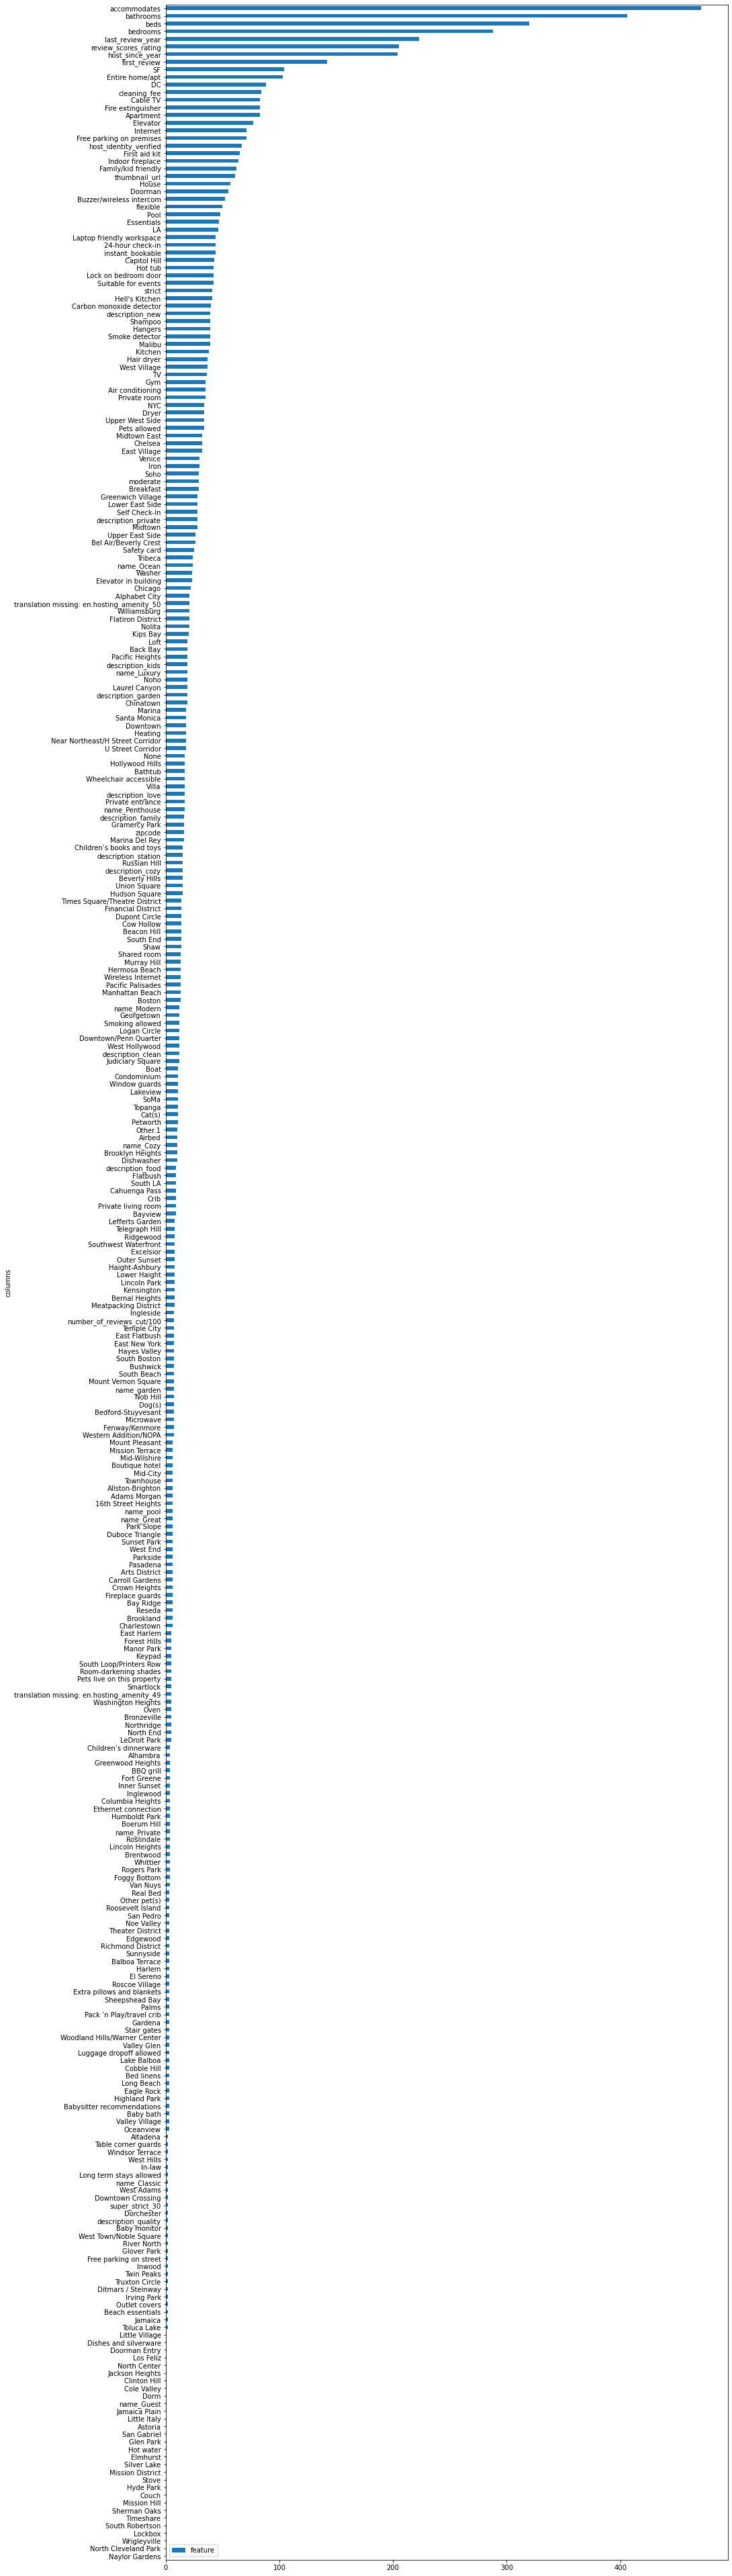

In [122]:
feature = LGBM.feature_importances_
feature_df = pd.DataFrame({'columns': train_data.columns[0:], 'feature': feature[:]}).set_index('columns')
feature_df_335 = feature_df.sort_values('feature', ascending=False).head(335)
display(feature_df_335.sort_values('feature', ascending=False))
feature_df_335.sort_values('feature').plot.barh(figsize=(15, 70));

- accommodates  欠損 0  
    最大収容人数  
    比例関係、特に問題無し


- bathrooms  欠損 0.3
    風呂の数、欠損0.3%  
    単純な比例関係だが、7以上の物は分布的に変  
    データセットから外したパターンも試してみる。  


- beds  欠損 0.1
    ベッドの数、欠損0.1%  
    13以上の数も分布的に変  
    同上  


- bedroom  欠損 0.1
    寝室の数、欠損0.1%  
    比例関係、特に問題なささそう  
    

- last review year  欠損 15  
    最後にレビューされた年  
    時系列データ、欠損15％ほど  
    最新の月から引いて数字のでーたにしても良いかもしれない  
    
    
- review_scores_rating  欠損 30  
    標準化済、分布データ
    レビュー評価 ほぼほぼ100なので100でおぎなってる  
    特に問題無し  
    
- host_since_year 欠損 0  
    時系列データ  
    最新の月から引く作業をやってみたい

- first_review 欠損 15％  
    bool値
    レビューされたかが重要であって、最初にいつされたかどうかは関係ないと思い0.1にしてる
    
- SF,DC 欠損 0％
    都市、特に気にせずこのまま使う  
    
- アメニティ各種  

試すこと
1. パラメータチューニング
2. 必要のなさそうな特徴量の削減
3. 特徴量の加工

# 検証データの作成

In [28]:
# 検証データと使うデータに分ける
X_70, test_X_30 = train_test_split(train_data.values, random_state=1).copy()
target_70, test_target_30 = train_test_split(target.values, random_state=1).copy()

In [29]:
# 訓練データとテストデータに分ける
train_X_49, val_X_21 = train_test_split(X_70, random_state=1).copy()
train_target_49, val_target_21 = train_test_split(target_70, random_state=1).copy()

# LGBMパラメータチューニング

## 対象パラメータ

In [218]:
#
# 対象パラメータ
#

learning_rate = [0.001 * i for i in range(65, 90)]
num_leaves = [i for i in range(35, 40)]
# デフォルトは無制限であるー1が与えられている。おそらく0を通過できないので、別にやる
#max_depth = [i for i in range(-1, 10)] 
min_data_in_leaf = [i for i in range(18, 24)]
n_estimators = [10 * i for i in range(25, 50)]
parameter = {'learning_rate' : learning_rate, 'num_leaves' : num_leaves, 'min_data_in_leaf' : min_data_in_leaf, 'n_estimators' : n_estimators}

## 全データ検証

In [461]:
from sklearn.model_selection import RandomizedSearchCV
start_time = time.time()
LGBM_search_full = LGBMRegressor(boosting_type='gbdt', objective='regression')
Grid_LGBM_full = RandomizedSearchCV(LGBM_search_full, parameter, cv=5, scoring='neg_root_mean_squared_error', n_iter=500)
Grid_LGBM_full.fit(X_70, target_70)
end_time = time.time() - start_time

[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] min

In [466]:
print(end_time)
Grid_LGBM_full_df = pd.DataFrame.from_dict(Grid_LGBM_full.cv_results_, orient='index').T # 結果をdataframeにして表示
Grid_LGBM_full_df.sort_values('rank_test_score').head(20)

4348.019575119019


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_num_leaves,param_n_estimators,param_min_data_in_leaf,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
87,1.295018,0.262374,0.089686,0.006052,38,470,23,0.066,"{'num_leaves': 38, 'n_estimators': 470, 'min_d...",-111.364514,-106.259813,-106.615454,-109.791006,-103.85521,-107.577199,2.674261,1
415,1.088232,0.041766,0.081669,0.00172,37,480,20,0.071,"{'num_leaves': 37, 'n_estimators': 480, 'min_d...",-111.641497,-105.9795,-106.908796,-109.705908,-103.88928,-107.624996,2.743671,2
12,1.489882,0.281946,0.094283,0.012789,35,430,18,0.067,"{'num_leaves': 35, 'n_estimators': 430, 'min_d...",-111.968725,-105.594742,-106.799303,-109.662261,-104.11472,-107.62795,2.833518,3
229,1.023007,0.04139,0.076434,0.001135,35,450,22,0.065,"{'num_leaves': 35, 'n_estimators': 450, 'min_d...",-111.063293,-106.127816,-106.738443,-110.324469,-104.055427,-107.66189,2.640893,4
210,0.950752,0.022984,0.067073,0.000926,36,390,19,0.067,"{'num_leaves': 36, 'n_estimators': 390, 'min_d...",-111.785735,-105.968489,-106.367055,-110.137143,-104.160463,-107.683777,2.82612,5
249,1.095752,0.041236,0.075778,0.001578,36,460,19,0.072,"{'num_leaves': 36, 'n_estimators': 460, 'min_d...",-111.523844,-106.000302,-106.623646,-109.890703,-104.406486,-107.688996,2.619737,6
409,0.800778,0.064033,0.052155,0.000478,37,280,21,0.07,"{'num_leaves': 37, 'n_estimators': 280, 'min_d...",-110.985433,-105.851226,-107.084271,-110.150737,-104.390112,-107.692356,2.512064,7
140,1.096087,0.17314,0.071447,0.009556,38,360,19,0.074,"{'num_leaves': 38, 'n_estimators': 360, 'min_d...",-111.346422,-105.924591,-106.48927,-110.025024,-104.692879,-107.695637,2.544121,8
359,1.091511,0.025564,0.082856,0.001045,37,490,19,0.066,"{'num_leaves': 37, 'n_estimators': 490, 'min_d...",-111.198374,-106.064633,-107.137348,-110.161098,-103.919617,-107.696214,2.667503,9
315,1.104947,0.022301,0.081878,0.001294,38,480,20,0.074,"{'num_leaves': 38, 'n_estimators': 480, 'min_d...",-111.498822,-106.141915,-106.766277,-109.659023,-104.440168,-107.701241,2.53751,10


In [474]:
Grid_LGBM_full.best_params_

{'num_leaves': 38,
 'n_estimators': 470,
 'min_data_in_leaf': 23,
 'learning_rate': 0.066}

In [478]:
LGBM_full_ver2 = LGBMRegressor(boosting_type='gbdt', num_leaves=38, n_estimators=470, min_data_in_leaf=23, learning_rate=0.066, objective='regression', metric='rmse')
LGBM_full_ver2.fit(train_X_49, train_target_49)
pred_ver2 = pd.DataFrame(LGBM_full_ver2.predict(test_data.values))
submit_ver2 = pd.concat([test_id, pred_ver2], axis=1)
submit_ver2.to_csv('predict_data version_2.csv', index=False, header=False)

[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23


## 検証データあり検証

In [462]:
from sklearn.model_selection import RandomizedSearchCV
start_time = time.time()
LGBM_search = LGBMRegressor(boosting_type='gbdt', objective='regression')
Grid_LGBM = RandomizedSearchCV(LGBM_search, parameter, cv=5, scoring='neg_root_mean_squared_error', n_iter=500)
Grid_LGBM.fit(train_X_70, ttarget_70)
end_time = time.time() - start_time

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min

In [467]:
Grid_LGBM_df = pd.DataFrame.from_dict(Grid_LGBM.cv_results_, orient='index').T # 結果をdataframeにして表示
Grid_LGBM_df.sort_values('rank_test_score').head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_num_leaves,param_n_estimators,param_min_data_in_leaf,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
242,0.742014,0.059293,0.044029,0.00054,36,330,22,0.076,"{'num_leaves': 36, 'n_estimators': 330, 'min_d...",-106.584392,-101.199608,-112.052685,-108.809567,-108.872374,-107.503725,3.601625,1
51,0.762552,0.04219,0.046435,0.000601,39,340,20,0.071,"{'num_leaves': 39, 'n_estimators': 340, 'min_d...",-105.988237,-101.320948,-112.244471,-109.098056,-108.914191,-107.513181,3.675023,2
308,0.77369,0.041166,0.050143,0.000955,36,380,22,0.076,"{'num_leaves': 36, 'n_estimators': 380, 'min_d...",-106.614242,-101.294217,-112.048636,-108.844201,-108.862453,-107.53275,3.56775,3
32,0.686631,0.043047,0.041502,0.00071,37,300,20,0.075,"{'num_leaves': 37, 'n_estimators': 300, 'min_d...",-106.111017,-101.282795,-111.395969,-109.861288,-109.114102,-107.553034,3.575708,4
399,0.664551,0.024461,0.04118,0.004582,36,290,21,0.073,"{'num_leaves': 36, 'n_estimators': 290, 'min_d...",-106.147675,-101.171193,-111.3799,-109.785948,-109.281998,-107.553343,3.6145,5
206,0.635458,0.027995,0.035313,0.000603,38,250,20,0.077,"{'num_leaves': 38, 'n_estimators': 250, 'min_d...",-105.995894,-101.273662,-111.620887,-109.958214,-108.929379,-107.555607,3.635431,6
86,0.712042,0.03252,0.043119,0.001028,36,320,20,0.067,"{'num_leaves': 36, 'n_estimators': 320, 'min_d...",-105.807817,-101.643685,-111.869991,-109.47632,-109.019705,-107.563504,3.534173,7
56,0.82333,0.033246,0.05592,0.000765,37,420,23,0.073,"{'num_leaves': 37, 'n_estimators': 420, 'min_d...",-106.086626,-101.856567,-111.839286,-109.06752,-108.969479,-107.563896,3.384418,8
244,0.82267,0.040002,0.054411,0.002742,36,420,22,0.08,"{'num_leaves': 36, 'n_estimators': 420, 'min_d...",-106.395523,-101.407538,-111.733097,-109.572451,-108.73056,-107.567834,3.522596,9
34,0.779638,0.027621,0.051419,0.000743,35,400,22,0.073,"{'num_leaves': 35, 'n_estimators': 400, 'min_d...",-106.727892,-101.313868,-111.992952,-109.320847,-108.492711,-107.569654,3.558868,10


In [196]:
Grid_LGBM.best_params_

{'num_leaves': 36,
 'n_estimators': 220,
 'min_data_in_leaf': 19,
 'max_depth': 0,
 'learning_rate': 0.075}

In [483]:
LGBM_full_ver3 = LGBMRegressor(boosting_type='gbdt', num_leaves=36, n_estimators=220, min_data_in_leaf=19, learning_rate=0.075, objective='regression', metric='rmse')
LGBM_full_ver3.fit(train_data.values, target.values)
pred_ver3 = pd.DataFrame(LGBM_full_ver3.predict(test_data.values))
submit_ver3 = pd.concat([test_id, pred_ver3], axis=1)
submit_ver3.to_csv('predict_data version_3.csv', index=False, header=False)

[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19


In [481]:
LGBM_full_ver3.fit(X_70, target_70)
result(LGBM_full_ver3, train_75=X_70, train_25=test_X_30, target_75=target_70, target_25=test_target_30)
print('time : {}sec'.format(end_time))

-----RMSE(train)-----
88.4053789899418
-----RMSE(test)-----
106.28651345252369
time : 2263.112972021103sec


# 特徴量の削減
## 少し削ったver

In [85]:
train_drop_data = train_drop_data.drop('y', axis=1)
train_drop_data = train_drop_data.drop('id', axis=1)
test_drop_data = test_drop_data.drop('id', axis=1)

In [86]:
train_drop_75, train_drop_25 = train_test_split(train_drop_data.values, random_state=0).copy()

In [95]:
start_time = time.time()
LGBM_drop = LGBMRegressor(boosting_type='gbdt', num_leaves=30, n_estimators=250, objective='regression')
LGBM_drop.fit(train_drop_75, target_75)
end_time = time.time() - start_time

In [96]:
start_time = time.time()
LGBM = LGBMRegressor(boosting_type='gbdt', num_leaves=30, n_estimators=250, objective='regression')
LGBM.fit(train_75, target_75)
end_time = time.time() - start_time

In [98]:
result(LGBM_drop, train_75=train_drop_75, train_25=train_drop_25)
result(LGBM)

-----RMSE(train)-----
90.08220790891251
-----RMSE(test)-----
112.98154009422794
-----RMSE(train)-----
87.40335994115921
-----RMSE(test)-----
109.75049010184249


In [91]:
train_data.shape, train_drop_data.shape

((55583, 843), (55583, 187))

## 50ver

In [108]:
feature_df_335.sort_values('feature', ascending=False).head(50).index

Index(['accommodates', 'bathrooms', 'beds', 'bedrooms', 'last_review_year',
       'review_scores_rating', 'host_since_year', 'first_review', 'SF',
       'Entire home/apt', 'DC', 'cleaning_fee', 'Cable TV',
       'Fire extinguisher', 'Apartment', 'Elevator', 'Internet',
       'Free parking on premises', 'host_identity_verified', 'First aid kit',
       'Indoor fireplace', 'Family/kid friendly', 'thumbnail_url', 'House',
       'Doorman', 'Buzzer/wireless intercom', 'flexible', 'Pool', 'Essentials',
       'LA', 'Laptop friendly workspace', '24-hour check-in',
       'instant_bookable', 'Capitol Hill', 'Hot tub', 'Lock on bedroom door',
       'Suitable for events', 'strict', 'Hell's Kitchen',
       'Carbon monoxide detector', 'description_new', 'Hangers', 'Malibu',
       'Shampoo', 'Smoke detector', 'Kitchen', 'Hair dryer', 'West Village',
       'TV', 'Gym'],
      dtype='object', name='columns')

In [109]:
train_data_ver50 = train_data

In [110]:
train_data_ver50 = train_data_ver50[feature_df_335.sort_values('feature', ascending=False).head(50).index]

In [111]:
train_data_ver50

,accommodates,bathrooms,beds,bedrooms,last_review_year,review_scores_rating,host_since_year,first_review,SF,Entire home/apt,...,description_new,Hangers,Malibu,Shampoo,Smoke detector,Kitchen,Hair dryer,West Village,TV,Gym
0,6.0,2.0,4.0,1.0,7.0,-4.831411,8.0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
1,2.0,1.0,1.0,1.0,8.0,0.626890,7.0,1,0,0,...,1,1,0,1,1,1,0,0,1,0
2,2.0,2.0,1.0,1.0,8.0,-1.692888,8.0,1,0,0,...,1,1,0,1,1,1,1,0,1,0
3,2.0,1.0,1.0,1.0,8.0,-0.055398,4.0,1,1,0,...,0,0,0,1,1,1,0,0,1,0
4,2.0,1.0,1.0,1.0,8.0,0.626890,7.0,1,0,1,...,0,1,0,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55578,4.0,1.5,1.0,1.0,8.0,-0.328313,5.0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
55579,2.0,1.0,1.0,1.0,7.0,-1.147058,7.0,1,0,0,...,0,0,0,1,1,1,0,0,1,0
55580,2.0,1.0,1.0,1.0,8.0,0.490432,8.0,1,1,0,...,0,1,0,1,1,1,0,0,1,0
55581,1.0,1.5,1.0,1.0,8.0,0.626890,8.0,1,0,0,...,0,1,0,1,1,0,0,0,1,0


In [112]:
train_data_ver50_75, train_data_ver50_25 = train_test_split(train_data_ver50.values, random_state=0).copy()

In [113]:
LGBM_50 = LGBMRegressor(boosting_type='gbdt', num_leaves=30, n_estimators=250, objective='regression')
LGBM_50.fit(train_data_ver50_75, target_75)
result(LGBM_50, train_75=train_data_ver50_75, train_25=train_data_ver50_25)
result(LGBM)

-----RMSE(train)-----
88.02089437142102
-----RMSE(test)-----
112.96998986520265
-----RMSE(train)-----
87.40335994115921
-----RMSE(test)-----
109.75049010184249


## 100ver

In [114]:
train_data_ver100 = train_data

In [116]:
train_data_ver100 = train_data_ver100[feature_df_335.sort_values('feature', ascending=False).head(100).index]
train_data_ver100_75, train_data_ver100_25 = train_test_split(train_data_ver100.values, random_state=0).copy()


In [118]:
LGBM_100 = LGBMRegressor(boosting_type='gbdt', num_leaves=30, n_estimators=250, objective='regression')
LGBM_100.fit(train_data_ver100_75, target_75)
result(LGBM_100, train_75=train_data_ver100_75, train_25=train_data_ver100_25)
result(LGBM)

-----RMSE(train)-----
86.16347953524033
-----RMSE(test)-----
111.13890460361881
-----RMSE(train)-----
87.40335994115921
-----RMSE(test)-----
109.75049010184249


## 150ver

In [121]:
train_data_ver150 = train_data
train_data_ver150 = train_data_ver150[feature_df_335.sort_values('feature', ascending=False).head(150).index]
train_data_ver150_75, train_data_ver150_25 = train_test_split(train_data_ver150.values, random_state=0).copy()
LGBM_150 = LGBMRegressor(boosting_type='gbdt', num_leaves=30, n_estimators=250, objective='regression')
LGBM_150.fit(train_data_ver150_75, target_75)
result(LGBM_150, train_75=train_data_ver150_75, train_25=train_data_ver150_25)
result(LGBM)

-----RMSE(train)-----
86.13251193834579
-----RMSE(test)-----
111.41110260302794
-----RMSE(train)-----
87.40335994115921
-----RMSE(test)-----
109.75049010184249


めちゃめちゃ頑張って削ったけど値は削らない方がよいという悲しい結果に落ち着いた。  
多分こんな感じに削っじゃうと、有効情報>誤差情報になっているのかと考えられる。  
まぁ。交差検証とかしてないので確実とは言えないが  
基本的にこのモデルの時は特徴量が多い方がもしかしたらよいのかもね！

# 特徴量の編集

## 時系列データの編集

In [413]:
train_time_data = pd.read_csv('train_cleaning time version1 matsu.csv')
test_time_data = pd.read_csv('test_cleaning time version1 matsu.csv')

train_time_data['training_set'] = True
test_time_data['training_set'] = False

In [414]:
full_time_data = pd.concat([train_time_data, test_time_data], axis=0).copy()
full_time_data.drop(['id', 'y'], axis=1, inplace=True)
time_data = full_time_data[['host_since','last_review']].copy()

In [415]:
import datetime
time_data['host_since'] = pd.to_datetime(time_data['host_since']).copy()
time_data['last_review'] = pd.to_datetime(time_data['last_review']).copy()

In [416]:
test = datetime.datetime(2020, 1, 1, 0, 0, 0)
time_data['last_review'].fillna(test, inplace=True)

In [417]:
time_data = time_data.reset_index()

In [418]:
time_data.drop('index', axis=1, inplace=True)

In [419]:
time_data['host_since'].sort_values(ascending=False), time_data['last_review'].sort_values(ascending=False)

(17405   2017-10-04
 34880   2017-10-04
 22317   2017-10-03
 51769   2017-10-01
 324     2017-10-01
            ...    
 72666          NaT
 72801          NaT
 73662          NaT
 73685          NaT
 73958          NaT
 Name: host_since, Length: 74111, dtype: datetime64[ns],
 11435   2020-01-01
 13804   2020-01-01
 27429   2020-01-01
 27430   2020-01-01
 63682   2020-01-01
            ...    
 13386   2010-11-04
 49441   2010-10-22
 36360   2010-07-17
 54537   2009-12-13
 869     2009-01-21
 Name: last_review, Length: 74111, dtype: datetime64[ns])

In [420]:
time_host_A = np.full((74111, 1), '2017-10-04')
time_host_B = np.full((74111, 1), '2017-10-05')
time_host = np.concatenate([time_host_A, time_host_B], axis=1)
time_host = pd.DataFrame(time_host, columns=['2017-10-04', '2017-10-05'])

In [421]:
time_host

,2017-10-04,2017-10-05
0,2017-10-04,2017-10-05
1,2017-10-04,2017-10-05
2,2017-10-04,2017-10-05
3,2017-10-04,2017-10-05
4,2017-10-04,2017-10-05
...,...,...
74106,2017-10-04,2017-10-05
74107,2017-10-04,2017-10-05
74108,2017-10-04,2017-10-05
74109,2017-10-04,2017-10-05


In [422]:
time_host['2017-10-04'] = pd.to_datetime(time_host['2017-10-04']).copy()
time_host['2017-10-05'] = pd.to_datetime(time_host['2017-10-05']).copy()

In [423]:
from datetime import timedelta
time_host['diff_A'] = time_host['2017-10-04'] - time_data['host_since']
time_host['diff_B'] = time_host['2017-10-05'] - time_data['last_review']
time_host

,2017-10-04,2017-10-05,diff_A,diff_B
0,2017-10-04,2017-10-05,448 days,435 days
1,2017-10-04,2017-10-05,644 days,188 days
2,2017-10-04,2017-10-05,501 days,53 days
3,2017-10-04,2017-10-05,1933 days,32 days
4,2017-10-04,2017-10-05,924 days,25 days
...,...,...,...,...
74106,2017-10-04,2017-10-05,2879 days,-818 days
74107,2017-10-04,2017-10-05,269 days,177 days
74108,2017-10-04,2017-10-05,1128 days,-818 days
74109,2017-10-04,2017-10-05,1297 days,150 days


In [424]:
time_host['diff_A'].describe()

count                           73923
mean     1170 days 22:04:50.150562064
std       661 days 11:55:52.200431088
min                   0 days 00:00:00
25%                 652 days 00:00:00
50%                1102 days 00:00:00
75%                1627 days 00:00:00
max                3502 days 00:00:00
Name: diff_A, dtype: object

In [425]:
time_host['diff_A'].median(), time_host['diff_A'].isnull().sum()

(Timedelta('1102 days 00:00:00'), 188)

In [426]:
time_host['diff_A'].fillna(time_host['diff_A'].median(), inplace=True)

In [428]:
time_host['diff_B'].isnull().sum()

0

In [429]:
time_host['diff_B'].fillna(test, inplace=True)

27%欠損しているのでそのまま残す。  
下でintに直すためにとりあえず10000

In [430]:
time_host.drop(['2017-10-04', '2017-10-05'], axis=1, inplace=True)
time_host.rename(columns={'diff_A': 'host_since_days', 'diff_B': 'last_review_days'}, inplace=True)
full_time_data.drop(['host_since','last_review'], axis=1, inplace=True)

In [431]:
time_host

,host_since_days,last_review_days
0,448 days,435 days
1,644 days,188 days
2,501 days,53 days
3,1933 days,32 days
4,924 days,25 days
...,...,...
74106,2879 days,-818 days
74107,269 days,177 days
74108,1128 days,-818 days
74109,1297 days,150 days


In [432]:
time_host['host_since_days'] = time_host['host_since_days'].dt.days.astype('int')
time_host['last_review_days'] = time_host['last_review_days'].dt.days.astype('int')

In [433]:
# timedeltaをintにする。　する意味はあるかは不明
time_host

,host_since_days,last_review_days
0,448,435
1,644,188
2,501,53
3,1933,32
4,924,25
...,...,...
74106,2879,-818
74107,269,177
74108,1128,-818
74109,1297,150


In [437]:
time_host['last_review_days'] = time_host['last_review_days'].replace(-818, np.nan)

In [438]:
time_host

,host_since_days,last_review_days
0,448,435.0
1,644,188.0
2,501,53.0
3,1933,32.0
4,924,25.0
...,...,...
74106,2879,NaN
74107,269,177.0
74108,1128,NaN
74109,1297,150.0


In [442]:
full_time_data = full_time_data.reset_index()
full_time_data.drop('index', axis=1, inplace=True)

In [443]:
full_time_data = pd.concat([full_time_data, time_host], axis=1)

In [445]:
train_time_data = full_time_data[full_time_data['training_set']==1.0]
test_time_data = full_time_data[full_time_data['training_set']==0.0]

## 学習

In [446]:
train_time_75, train_time_25 = train_test_split(train_time_data.values, random_state=0).copy()

In [447]:
start_time = time.time()
LGBM_time = LGBMRegressor(boosting_type='gbdt', num_leaves=30, n_estimators=250, objective='regression', metric='rmse')
LGBM_time.fit(train_time_75, target_75)
end_time = time.time() - start_time

In [450]:
result(LGBM_time, train_75=train_time_75, train_25=train_time_25)
print('time : {}sec'.format(end_time))

-----RMSE(train)-----
85.86353641495768
-----RMSE(test)-----
109.33465077730087
time : 1.7242701053619385sec


,feature
columns,
last_review_days,691
host_since_days,512
accommodates,469
bathrooms,383
bedrooms,256
...,...
Wide hallway clearance,0
San Gabriel,0
Disabled parking spot,0


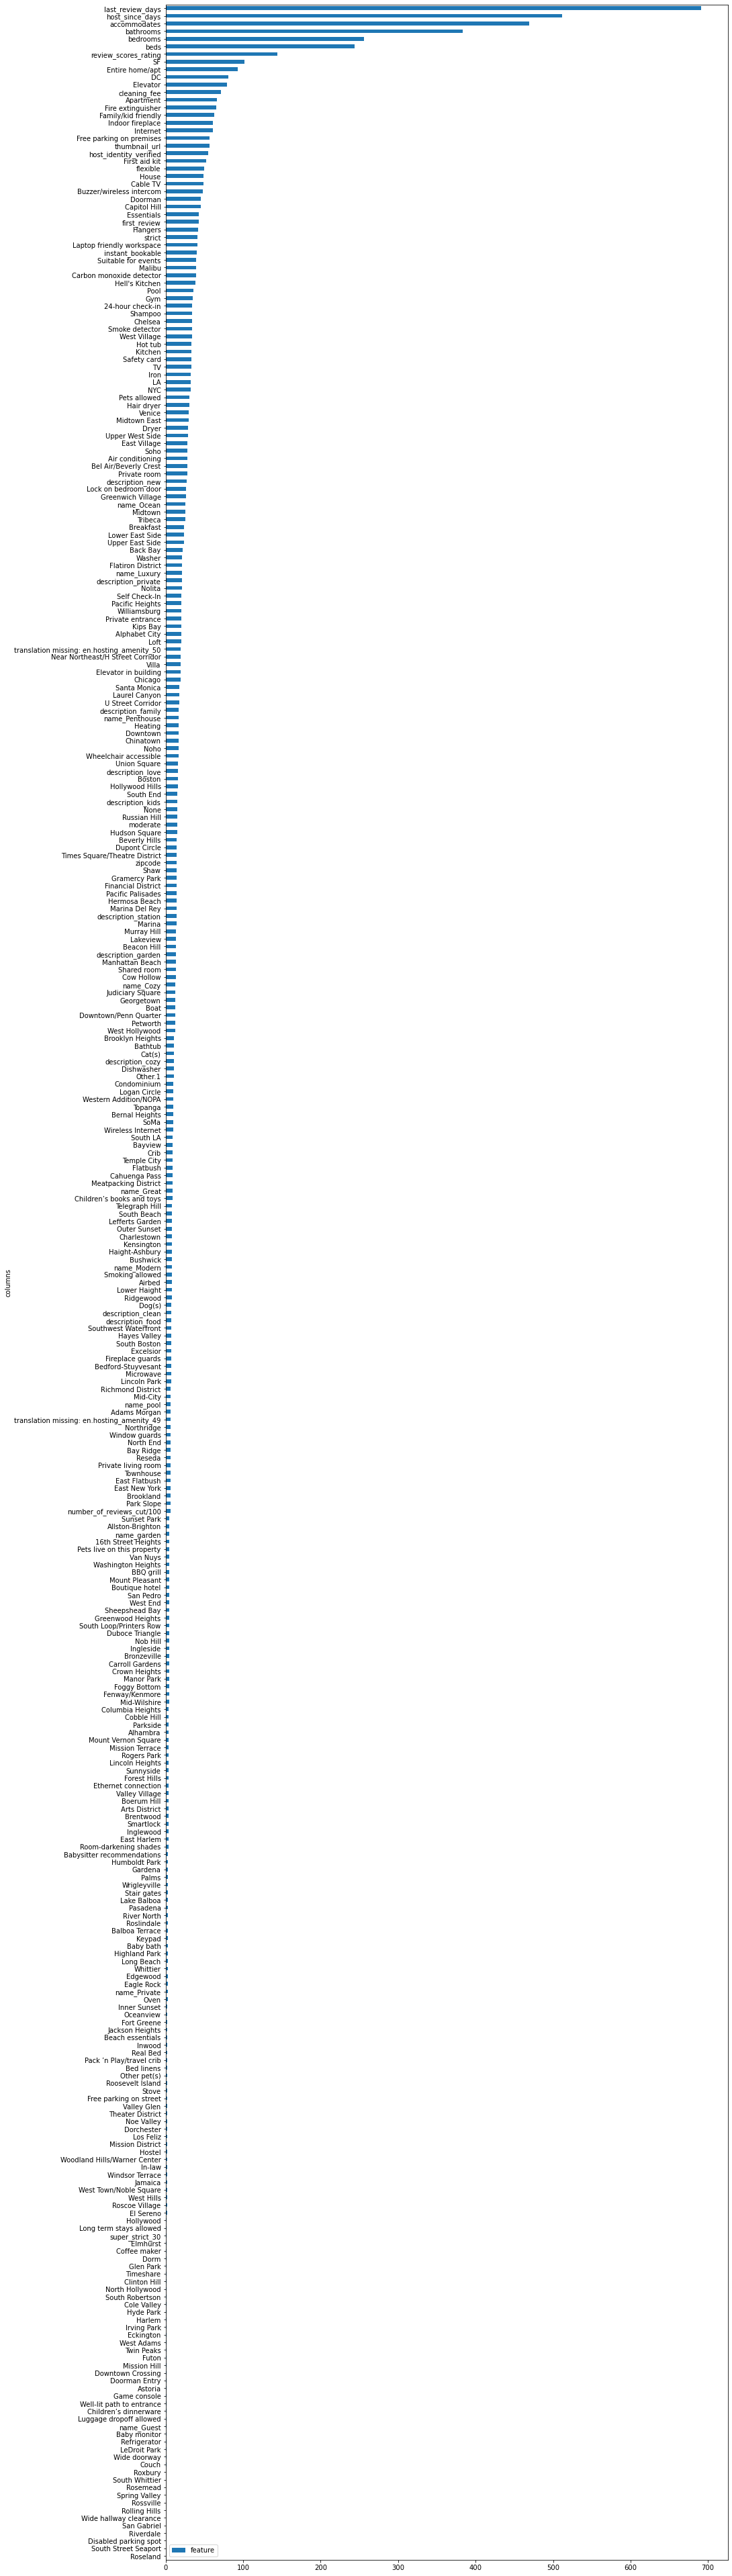

In [451]:
feature = LGBM_time.feature_importances_
feature_df = pd.DataFrame({'columns': train_time_data.columns[0:], 'feature': feature[:]}).set_index('columns')
feature_df_335 = feature_df.sort_values('feature', ascending=False).head(335)
display(feature_df_335.sort_values('feature', ascending=False))
feature_df_335.sort_values('feature').plot.barh(figsize=(15, 70));

## チューニング
### 全データ

In [469]:
start_time = time.time()
LGBM_search_full_time = LGBMRegressor(boosting_type='gbdt', objective='regression')
Grid_LGBM_full_time = RandomizedSearchCV(LGBM_search_full_time, parameter, cv=5, scoring='neg_root_mean_squared_error', n_iter=200)
Grid_LGBM_full_time.fit(train_time_75, target_70)
end_time = time.time() - start_time

[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] min

In [471]:
print(end_time)
Grid_LGBM_full_time_df = pd.DataFrame.from_dict(Grid_LGBM_full_time.cv_results_, orient='index').T # 結果をdataframeにして表示
Grid_LGBM_full_time_df.sort_values('rank_test_score').head(20)

2263.112972021103


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_num_leaves,param_n_estimators,param_min_data_in_leaf,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
99,1.525432,0.021292,0.279433,0.005814,35,260,20,0.068,"{'num_leaves': 35, 'n_estimators': 260, 'min_d...",-171.343233,-168.697694,-167.466789,-167.047952,-172.47337,-169.405808,2.144027,1
139,1.542443,0.040666,0.275723,0.00192,39,260,19,0.065,"{'num_leaves': 39, 'n_estimators': 260, 'min_d...",-171.327597,-168.961726,-167.610147,-166.570521,-172.661895,-169.426377,2.269525,2
51,1.613417,0.17031,0.28065,0.009405,38,260,23,0.066,"{'num_leaves': 38, 'n_estimators': 260, 'min_d...",-171.219891,-168.919546,-167.721362,-166.782235,-172.577998,-169.444206,2.158854,3
182,2.228586,0.263237,0.320585,0.018513,39,270,22,0.067,"{'num_leaves': 39, 'n_estimators': 270, 'min_d...",-171.545268,-168.979076,-167.553098,-166.845244,-172.580985,-169.500734,2.226437,4
89,1.598435,0.135042,0.279525,0.007952,36,270,18,0.067,"{'num_leaves': 36, 'n_estimators': 270, 'min_d...",-171.398792,-168.884878,-167.374271,-167.142994,-172.868362,-169.533859,2.253802,5
41,1.606995,0.203451,0.278977,0.005356,37,270,18,0.068,"{'num_leaves': 37, 'n_estimators': 270, 'min_d...",-171.5089,-168.948035,-167.564724,-166.976403,-172.825691,-169.564751,2.258027,6
142,1.492906,0.063494,0.272055,0.005015,37,250,21,0.072,"{'num_leaves': 37, 'n_estimators': 250, 'min_d...",-171.486654,-169.228164,-167.602159,-167.186462,-172.540904,-169.608868,2.105364,7
143,1.572839,0.023947,0.278997,0.002217,39,260,21,0.067,"{'num_leaves': 39, 'n_estimators': 260, 'min_d...",-171.613799,-169.115136,-167.642835,-166.865167,-172.857918,-169.618971,2.289652,8
106,1.544699,0.023487,0.283333,0.003931,39,270,23,0.068,"{'num_leaves': 39, 'n_estimators': 270, 'min_d...",-171.559294,-168.986473,-167.878658,-166.948071,-172.794438,-169.633387,2.209518,9
6,1.547652,0.180995,0.277114,0.008909,36,260,23,0.076,"{'num_leaves': 36, 'n_estimators': 260, 'min_d...",-171.652495,-168.869096,-167.690635,-167.120024,-172.917167,-169.649883,2.259826,10


In [484]:
Grid_LGBM_full_time.best_params_

{'num_leaves': 35,
 'n_estimators': 260,
 'min_data_in_leaf': 20,
 'learning_rate': 0.068}

In [485]:
LGBM_full_ver4 = LGBMRegressor(boosting_type='gbdt', num_leaves=35, n_estimators=260, min_data_in_leaf=20, learning_rate=0.068, objective='regression', metric='rmse')
LGBM_full_ver4.fit(train_time_data.values, target.values)
pred_ver4 = pd.DataFrame(LGBM_full_ver4.predict(test_time_data.values))
submit_ver4 = pd.concat([test_id, pred_ver4], axis=1)
submit_ver4.to_csv('predict_data version_4.csv', index=False, header=False)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


##  検証データあり

In [457]:
train_time_49, train_time_21 = train_test_split(train_time_75, random_state=0).copy()

In [464]:
start_time = time.time()
LGBM_search_val_time = LGBMRegressor(boosting_type='gbdt', objective='regression')
Grid_LGBM_val_time = RandomizedSearchCV(LGBM_search_val_time, parameter, cv=5, scoring='neg_root_mean_squared_error', n_iter=500)
Grid_LGBM_val_time.fit(train_time_49, train_target_49)
end_time = time.time() - start_time

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] min

In [470]:
print(end_time)
Grid_LGBM_val_time_df = pd.DataFrame.from_dict(Grid_LGBM_val_time.cv_results_, orient='index').T # 結果をdataframeにして表示
Grid_LGBM_val_time_df.sort_values('rank_test_score').head(20)

2263.112972021103


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_num_leaves,param_n_estimators,param_min_data_in_leaf,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
355,1.232168,0.027862,0.22609,0.001751,35,250,20,0.07,"{'num_leaves': 35, 'n_estimators': 250, 'min_d...",-169.506678,-163.161513,-170.700398,-169.535816,-173.564965,-169.293874,3.403827,1
101,1.212367,0.006968,0.228556,0.002622,35,250,21,0.066,"{'num_leaves': 35, 'n_estimators': 250, 'min_d...",-169.644642,-162.985919,-170.588207,-169.965214,-173.318297,-169.300456,3.412773,2
137,1.25598,0.027191,0.230064,0.001741,36,270,22,0.066,"{'num_leaves': 36, 'n_estimators': 270, 'min_d...",-169.564104,-163.094389,-170.586122,-170.006083,-173.323856,-169.314911,3.374088,3
308,1.224629,0.021788,0.225394,0.001128,35,250,20,0.071,"{'num_leaves': 35, 'n_estimators': 250, 'min_d...",-169.555806,-163.423188,-170.421851,-169.781931,-173.589162,-169.354388,3.300766,4
86,1.241627,0.02299,0.228288,0.001256,39,250,23,0.067,"{'num_leaves': 39, 'n_estimators': 250, 'min_d...",-169.317878,-163.273356,-170.742158,-170.044464,-173.408311,-169.357233,3.341157,5
490,1.214934,0.021588,0.227237,0.003819,35,250,23,0.073,"{'num_leaves': 35, 'n_estimators': 250, 'min_d...",-169.380629,-163.179754,-170.646971,-169.896541,-173.783415,-169.377462,3.455578,6
376,1.283462,0.137898,0.23039,0.004841,36,250,22,0.071,"{'num_leaves': 36, 'n_estimators': 250, 'min_d...",-169.689457,-163.239239,-170.628498,-170.0428,-173.382916,-169.396582,3.341399,7
209,1.36359,0.105367,0.23198,0.003241,35,260,20,0.069,"{'num_leaves': 35, 'n_estimators': 260, 'min_d...",-169.375022,-163.447561,-170.78568,-169.934387,-173.594395,-169.427409,3.323463,8
352,1.228829,0.012168,0.228563,0.004943,36,260,23,0.07,"{'num_leaves': 36, 'n_estimators': 260, 'min_d...",-169.651477,-163.388773,-170.886786,-169.831492,-173.392777,-169.430261,3.302499,9
311,1.235237,0.027621,0.228211,0.003945,38,250,19,0.068,"{'num_leaves': 38, 'n_estimators': 250, 'min_d...",-169.315923,-163.664832,-170.775744,-170.109986,-173.466239,-169.466545,3.218948,10


In [486]:
Grid_LGBM_val_time.best_params_

{'num_leaves': 35,
 'n_estimators': 250,
 'min_data_in_leaf': 20,
 'learning_rate': 0.07}

In [487]:
LGBM_full_ver5 = LGBMRegressor(boosting_type='gbdt', num_leaves=35, n_estimators=250, min_data_in_leaf=20, learning_rate=0.07, objective='regression', metric='rmse')
LGBM_full_ver5.fit(train_time_data.values, target.values)
pred_ver5 = pd.DataFrame(LGBM_full_ver5.predict(test_time_data.values))
submit_ver5 = pd.concat([test_id, pred_ver5], axis=1)
submit_ver5.to_csv('predict_data version_5.csv', index=False, header=False)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


In [ ]:
# LGBM_log_ver5 = LGBMRegressor(boosting_type='gbdt', num_leaves=35, n_estimators=250, min_data_in_leaf=20, learning_rate=0.07, objective='regression', metric='rmse')
# LGBM_log_ver5.fit(train_data, target)
# LGBM_log_ver5.predict(test_data)

In [ ]:
# LGBM_full_ver3.fit(X_70, target_70)
# result(LGBM_full_ver3, train_75=X_70, train_25=test_X_30, target_75=target_70, target_25=test_target_30)
# print('time : {}sec'.format(end_time))

## 悔しいからもっかいフルデータをスコア良かったパラメータで調整

In [491]:
LGBM_full_ver7 = LGBMRegressor(boosting_type='gbdt', num_leaves=38, n_estimators=470, min_data_in_leaf=23, learning_rate=0.066, objective='regression')
LGBM_full_ver7.fit(train_time_data.values, target.values)
pred_ver7 = pd.DataFrame(LGBM_full_ver7.predict(test_time_data.values))
submit_ver7 = pd.concat([test_id, pred_ver7], axis=1)
submit_ver7.to_csv('predict_data version_7.csv', index=False, header=False)

[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
